# Cepstrum/Liftering

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [27]:
from IPython.display import Audio

In [2]:
plt.rcParams['axes.grid'] = True

In [3]:
sr = 44100
T = 1
N = T*sr
n = arange(N)
t = n/sr

In [4]:
import librosa

In [5]:
x,sr = librosa.load('../data/drumLoop.wav', sr=None)
N = len(x)
n = arange(N)
t = n/sr

In [7]:
def delFb(x, z, z2):
    y = zeros_like(x)
    y1 = 0
    for n in range(len(x)):
        y0 = y[n-z]*0.0 + x[n] + x[n-z2]*0.5
        y[n] = y0
        # y1 = 
    return y 

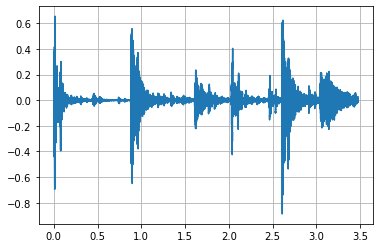

In [8]:
y = delFb(x,3000, 3000)
# y = x 
plot(t,y)

In [9]:
spec = fft.fft(y)
mag_cep = fft.ifft(log(abs(spec)))

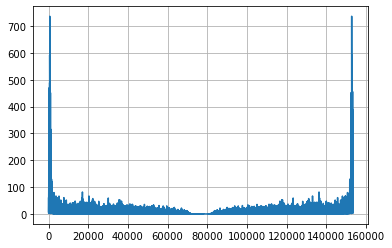

In [10]:
plot(abs(spec))

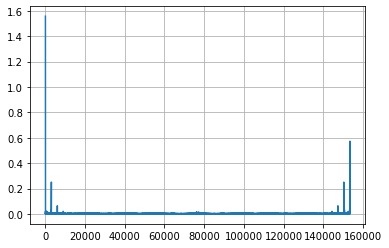

In [11]:
plot(abs(mag_cep))

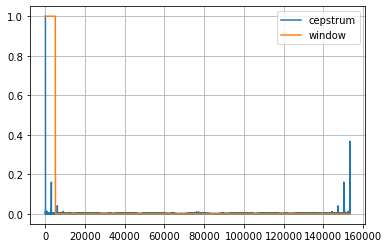

In [12]:
window = zeros(N)
window[0:5000] = 1
plot(abs(mag_cep)/max(abs(mag_cep)),label='cepstrum')
plot(window, label='window')
legend()

In [13]:
liftered = mag_cep*window

In [14]:
l_spec = fft.ifft(liftered)

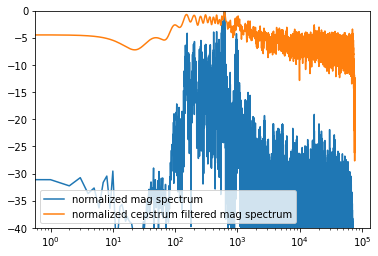

In [15]:
semilogx(20*log10(abs(spec)[0:N//2]/max(abs(spec))), label='normalized mag spectrum')
semilogx(20*log10(abs(l_spec)[0:N//2]/max(abs(l_spec))), label='normalized cepstrum filtered mag spectrum')
legend(loc='lower left')
ylim([-40,0])
grid()

# Liftering to remove echo

**using 2 ffts works to get something, lets us transform back to get the original but seems to yield not the kind of cepstrum we want. Seems more like a time reversed time signal:**

Text(0.5, 1.0, 'complex cepstrum')

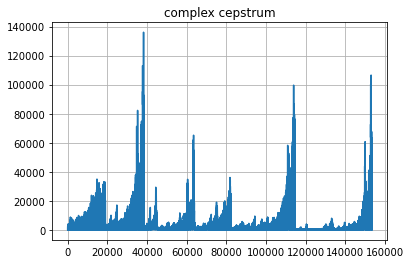

In [16]:
ccep = fft.fft(spec)
plot(abs(ccep))
title("complex cepstrum")

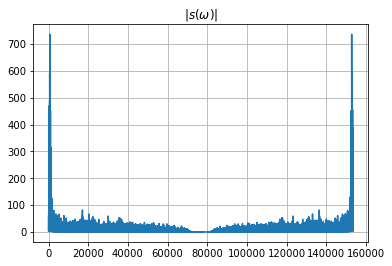

In [17]:
l_cspec = fft.ifft(ccep)
plot(abs(l_cspec))
_=title('$|s(\omega)|$')

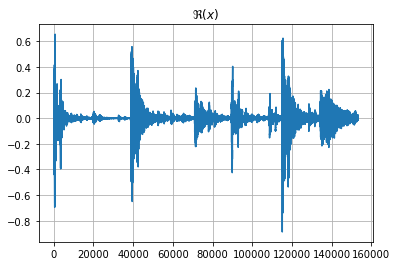

In [18]:
l_x = real(fft.ifft(l_cspec))
plot(l_x)
_=title('$\Re(x)$')

## via log ifft

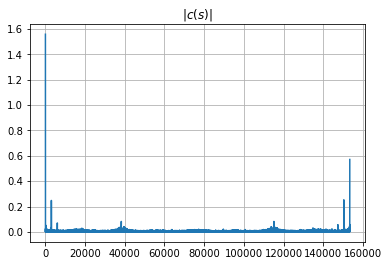

In [19]:
ccep = fft.ifft(log(spec))
plot(abs(ccep))
_=title("$|c(s)|$")

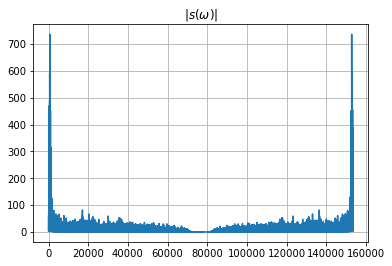

In [20]:
l_cspec = exp(fft.fft(ccep))
plot(abs(l_cspec))
_=title('$|s(\omega)|$')

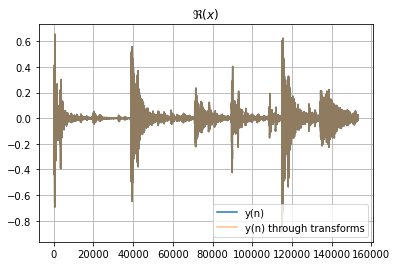

In [32]:
l_y = real(fft.ifft(l_cspec))
plot(y, label='y(n)')
plot(l_y, label='y(n) through transforms',alpha=0.5)
legend()
_=title('$\Re(x)$')

In [33]:
Audio(l_y,rate=sr)

## Liftering

(-100.0, 10000.0)

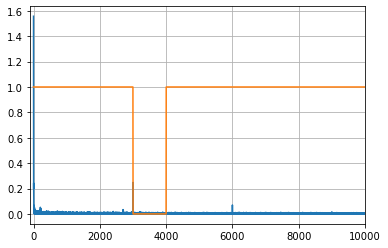

In [74]:
window = ones(N)
window[3000:4000] = 0
window[N//2:] = flip(window[0:N//2])
plot(abs(ccep))
plot(window)
xlim([-100,10000])


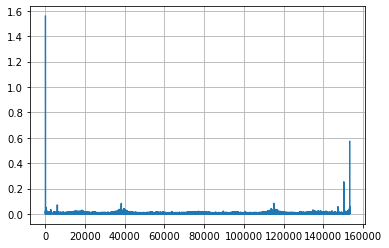

In [75]:
liftered = ccep*window
plot(abs(liftered))

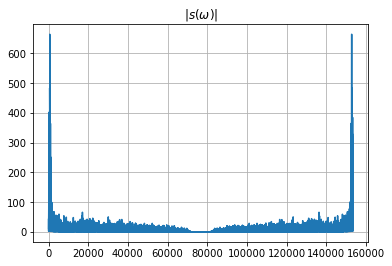

In [76]:
l_cspec = exp(fft.fft(liftered))
plot(abs(l_cspec))
_=title('$|s(\omega)|$')

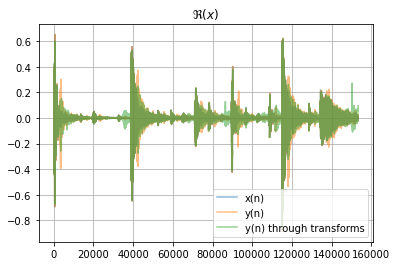

In [77]:
l_y = real(fft.ifft(l_cspec))
plot(x, label='x(n)',alpha=0.5)
plot(y, label='y(n)',alpha=0.5)
plot(l_y, label='y(n) through transforms',alpha=0.5)

legend()
_=title('$\Re(x)$')

# Recovered Original without echo!

In [78]:
Audio(l_y,rate=sr)